In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import re
import matplotlib.lines as mlines
import datetime as dt

## Define dictionary for reanalysis plotting color

In [3]:
color = {
         'MERRA2': '#E21F26',
         'MERRA': '#F69999',
         'ERAI': '#295F8A',
         'ERA5': '#5F98C6',
         'ERA40': '#AFCBE3',
         'JRA55': '#723B7A',
         'JRA-55C': '#AD71B5',
         'JRA-25': '#D6B8DA',
         'NCEP-R1': '#F57E20',
         'NCEP-R2': '#FDBF6E',
         '20CRv2c': '#EC008C',
         '20CRv2': '#F799D1',
         'CERA-20C': '#00AEEF',
         'ERA-20C': '#60C8E8',
         'CFSR': '#34A048',
         'REM': '#B35B28',
         'Other': '#FFD700',
         'Obs': '#000000',
         'Other Obs': '#777777',
        }

name_dict = {
         'cfsr': 'CFSR',
         'erai': 'ERAI',
         'gpcp': 'Obs',
         'jra55': 'JRA55',
         'merra': 'MERRA',
         'merra2': 'MERRA2',
         'ncepr1': 'NCEP-R1',
         'ncepr2': 'NCEP-R2',
         'twentyCRv2': '20CRv2',
         'twentyCRv2c': '20CRv2c',
         '20CRv2': '20CRv2',
         '20CRv2c': '20CRv2c',
         'era20c': 'ERA-20C'
         }

In [4]:
def read_data(filepath):
    """Reads csv file downloaded from NOAA WRIT"""
    p = re.compile(r'(?<=reanalysis_writ\/)\w+')
    df = pd.read_csv(filepath, header=None, skiprows=1, index_col='Date', 
                     names=['Date', name_dict[p.search(filepath).group(0)]],
                     parse_dates=True, na_values=-9999.000)
    return df

In [5]:
dirpath = r'/home/apbarret/data/reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.prate.global.month.smoothed.csv') )
fileGlob

df = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df.head()

,CFSR,Obs,ERAI,20CRv2c,NCEP-R2,NCEP-R1,MERRA,20CRv2,JRA55
Date,,,,,,,,,
1979-01-01,NaN,NaN,NaN,3.072,NaN,2.694,NaN,3.091,3.232
1979-02-01,NaN,NaN,NaN,3.068,NaN,2.693,NaN,3.086,3.228
1979-03-01,NaN,NaN,NaN,3.071,NaN,2.690,NaN,3.087,3.227
1979-04-01,NaN,NaN,NaN,3.069,NaN,2.690,NaN,3.087,3.221
1979-05-01,NaN,NaN,NaN,3.072,NaN,2.697,NaN,3.090,3.222


In [6]:
#dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.prate.70Nto90N.ocean.month.smoothed.csv') )
fileGlob

df_arctic = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df_arctic.head()

,ERAI,NCEP-R2,JRA55,CFSR,20CRv2c,Obs,NCEP-R1,MERRA
Date,,,,,,,,
1979-01-01,NaN,NaN,0.937,NaN,1.023,NaN,0.757,NaN
1979-02-01,NaN,NaN,0.954,NaN,1.031,NaN,0.765,NaN
1979-03-01,NaN,NaN,0.983,NaN,1.057,NaN,0.782,NaN
1979-04-01,NaN,NaN,0.977,NaN,1.049,NaN,0.776,NaN
1979-05-01,NaN,NaN,0.965,NaN,1.037,NaN,0.779,NaN


In [7]:
#dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.pwat.70Nto90N.ocean.month.smoothed.csv') )
fileGlob

df_arctic_pwat = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df_arctic_pwat.head()

,MERRA,NCEP-R1,JRA55,20CRv2c,ERA-20C,NCEP-R2,MERRA2,CFSR,ERAI
Date,,,,,,,,,
1979-01-01,NaN,6.489,5.950,7.003,5.450,NaN,NaN,NaN,NaN
1979-02-01,NaN,6.557,6.020,7.005,5.507,NaN,NaN,NaN,NaN
1979-03-01,NaN,6.626,6.094,7.093,5.548,NaN,NaN,NaN,NaN
1979-04-01,NaN,6.623,6.094,7.077,5.547,NaN,NaN,NaN,NaN
1979-05-01,NaN,6.613,6.082,7.086,5.538,NaN,NaN,NaN,NaN


## Get my MERRA2 series

In [9]:
#dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
filepath = os.path.join(dirpath, 'merra2.prate.global_mean.csv')
merra2 = pd.read_csv(filepath, header=None, index_col=0, parse_dates=True, names=['MERRA2'])
merra2 = merra2.rolling(center=True, window=12).mean()
df['MERRA2'] = merra2
df.head(20)

,CFSR,Obs,ERAI,20CRv2c,NCEP-R2,NCEP-R1,MERRA,20CRv2,JRA55,MERRA2
Date,,,,,,,,,,
1979-01-01,NaN,NaN,NaN,3.072,NaN,2.694,NaN,3.091,3.232,NaN
1979-02-01,NaN,NaN,NaN,3.068,NaN,2.693,NaN,3.086,3.228,NaN
1979-03-01,NaN,NaN,NaN,3.071,NaN,2.690,NaN,3.087,3.227,NaN
1979-04-01,NaN,NaN,NaN,3.069,NaN,2.690,NaN,3.087,3.221,NaN
1979-05-01,NaN,NaN,NaN,3.072,NaN,2.697,NaN,3.090,3.222,NaN
1979-06-01,3.105,2.672,2.896,3.068,3.047,2.703,2.390,3.089,3.218,NaN
1979-07-01,3.106,2.670,2.903,3.066,3.051,2.701,2.390,3.087,3.218,NaN
1979-08-01,3.104,2.662,2.905,3.063,3.046,2.699,2.393,3.087,3.218,NaN
1979-09-01,3.107,2.659,2.912,3.068,3.054,2.709,2.397,3.090,3.222,NaN


In [10]:
filepath = os.path.join(dirpath, 'era5.prate.mm_per_day.global_mean.1979to2018.csv')
era5 = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5 = era5.rolling(center=True, window=12).mean()
era5.head()

df['ERA5'] = era5
df.tail(20)

,CFSR,Obs,ERAI,20CRv2c,NCEP-R2,NCEP-R1,MERRA,20CRv2,JRA55,MERRA2,ERA5
Date,,,,,,,,,,,
2017-05-01,NaN,2.699,2.971,NaN,3.340,2.866,NaN,NaN,3.349,2.973314,2.988038
2017-06-01,NaN,2.700,2.969,NaN,3.340,2.863,NaN,NaN,3.345,2.972507,2.987495
2017-07-01,NaN,2.703,2.975,NaN,3.347,2.871,NaN,NaN,3.347,2.971765,2.985890
2017-08-01,NaN,2.705,2.977,NaN,3.341,2.865,NaN,NaN,3.342,2.973856,2.987097
2017-09-01,NaN,2.705,2.980,NaN,3.336,2.863,NaN,NaN,3.338,2.971226,2.983732
2017-10-01,NaN,2.697,2.984,NaN,3.331,2.858,NaN,NaN,3.335,2.970628,2.983077
2017-11-01,NaN,2.687,2.987,NaN,3.331,2.858,NaN,NaN,3.333,2.968477,2.982525
2017-12-01,NaN,2.683,2.986,NaN,3.334,2.857,NaN,NaN,3.330,2.965676,2.980687
2018-01-01,NaN,2.682,2.986,NaN,3.339,2.860,NaN,NaN,3.327,2.966068,2.978332


In [11]:
filepath = os.path.join(dirpath, 'era5.prate.arctic_cap_mean.1979to2018.csv')
era5_arctic = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5_arctic = era5_arctic.rolling(center=True, window=12).mean()
era5_arctic.head()

df_arctic['ERA5'] = era5_arctic

filepath = os.path.join(dirpath, 'merra2.prate.arctic_cap_mean.csv')
merra2_arctic = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
merra2_arctic = merra2_arctic.rolling(center=True, window=12).mean()
merra2_arctic.head()

df_arctic['MERRA2'] = merra2_arctic
#df_arctic.tail(20)

<IPython.core.display.Javascript object>


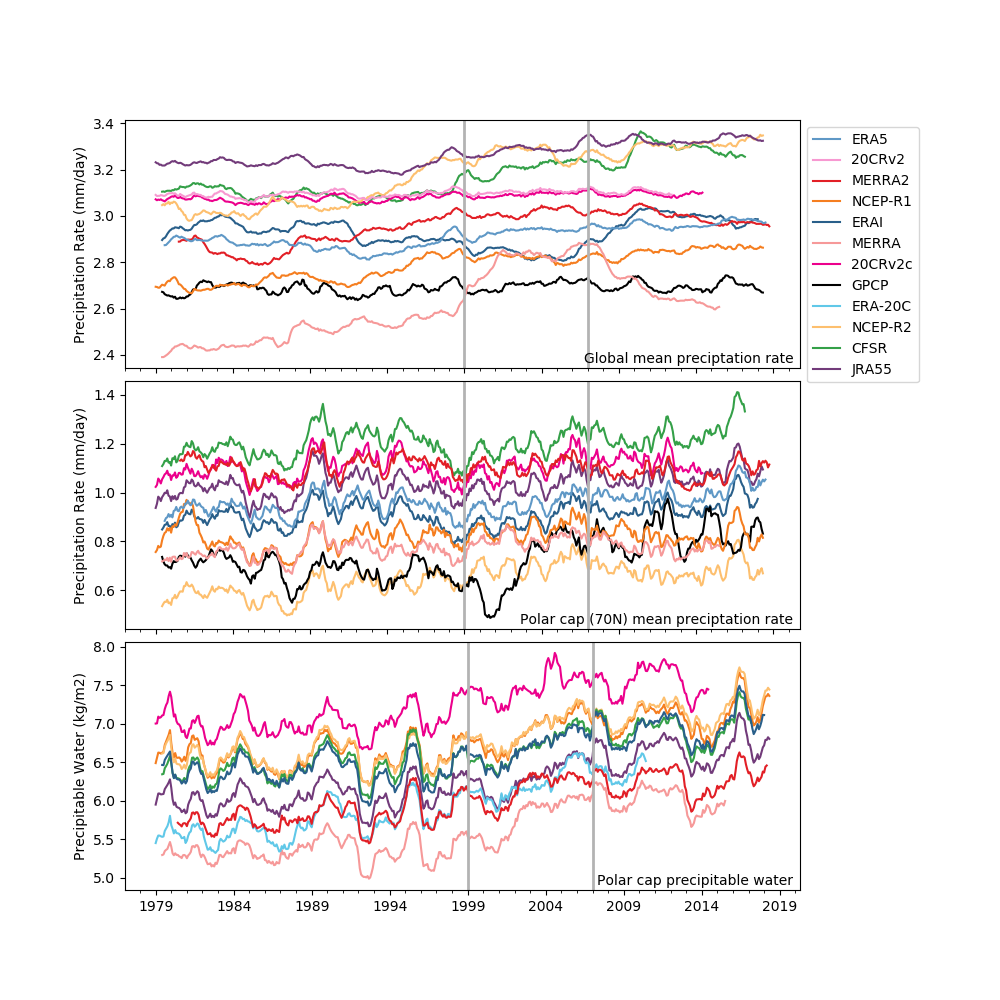

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

df.plot(ax=ax[0], color=[color[c] for c in df.columns], legend=False)
#merra2.plot(ax=ax[0], color=color['MERRA2'], legend=False)
ax[0].set_ylabel('Precipitation Rate (mm/day)')
ax[0].set_xlabel('')
ax[0].set_xticklabels([])
ax[0].text(0.99, 0.01, 'Global mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[0].transAxes)
ax[0].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[0].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)

df_arctic.plot(ax=ax[1], color=[color[c] for c in df_arctic.columns], legend=False)
ax[1].set_ylabel('Precipitation Rate (mm/day)')
ax[1].set_xlabel('')
ax[1].set_xticklabels([])
ax[1].text(0.99, 0.01, 'Polar cap (70N) mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[1].transAxes)
ax[1].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[1].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)

df_arctic_pwat.plot(ax=ax[2], color=[color[c] for c in df_arctic_pwat.columns], legend=False)
ax[2].set_ylabel('Precipitable Water (kg/m2)')
ax[2].text(0.99, 0.01, 'Polar cap precipitable water', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[2].transAxes)
ax[2].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[2].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)
ax[2].set_xlabel('')

# Make legend handles and labels
labels = list( set(df.columns.tolist()+df_arctic.columns.tolist()+df_arctic_pwat.columns.tolist()) )
handles = [mlines.Line2D([], [], color=color[l],) for l in labels]
labels = [l if l != 'Obs' else 'GPCP' for l in labels]

ax[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 1.))
plt.subplots_adjust(right=0.8, hspace=0.05)

In [55]:
these = list(set(names).intersection(df.columns.tolist()))
these

['CFSR', 'Obs', 'ERAI', 'MERRA', 'MERRA2', 'JRA55']

<IPython.core.display.Javascript object>


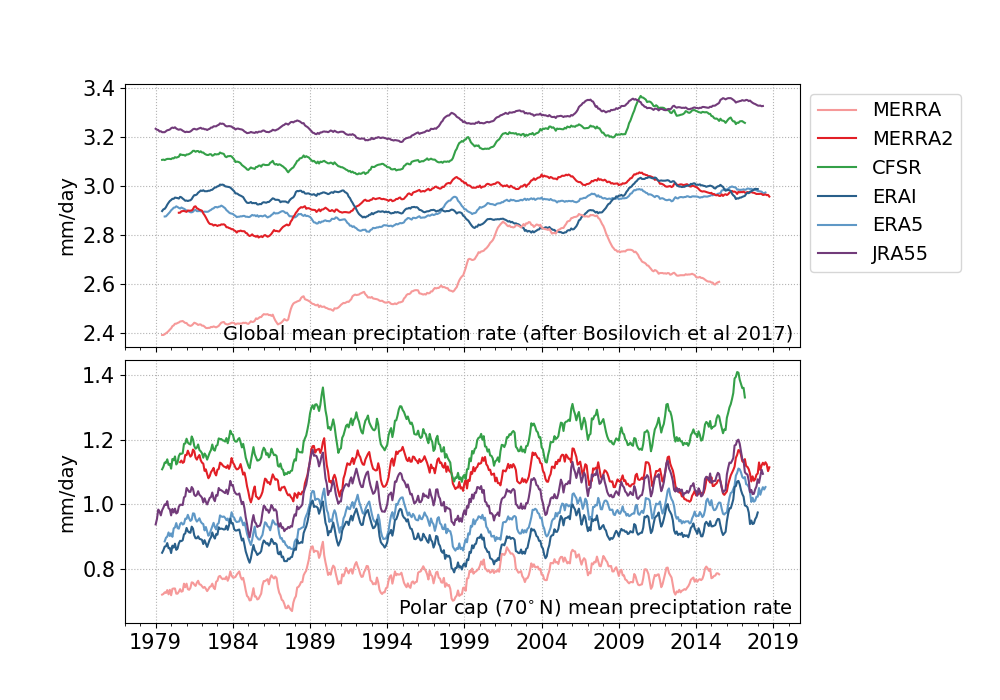

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

glob_names = ['MERRA', 'MERRA2', 'CFSR', 'ERAI', 'ERA5', 'JRA55']
these = list(set(glob_names).intersection(df.columns.tolist()))
df[these].plot(ax=ax[0], color=[color[c] for c in df[these].columns], legend=False)
#merra2.plot(ax=ax[0], color=color['MERRA2'], legend=False)
ax[0].set_ylabel('mm/day', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_xticklabels([])
ax[0].text(0.99, 0.01, 'Global mean preciptation rate (after Bosilovich et al 2017)', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[0].transAxes, fontsize=14)
ax[0].grid(which='major', linestyle=':', color='0.7')

arctic_names = ['MERRA', 'MERRA2', 'CFSR', 'ERAI', 'ERA5', 'JRA55']
these = list(set(arctic_names).intersection(df_arctic.columns.tolist()))
df_arctic[these].plot(ax=ax[1], color=[color[c] for c in df_arctic[these].columns], legend=False)
ax[1].set_ylabel('mm/day', fontsize=14)
ax[1].set_xlabel('')
#ax[1].set_xticklabels([])
ax[1].text(0.99, 0.01, 'Polar cap ($70^{\circ}\,\mathrm{N}$) mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[1].transAxes, fontsize=14)
ax[1].grid(which='major', linestyle=':', color='0.7')

#these = list(set(names).intersection(df_arctic_pwat.columns.tolist()))
#df_arctic_pwat[these].plot(ax=ax[2], color=[color[c] for c in df_arctic_pwat[these].columns], legend=False)
#ax[2].set_ylabel('Precipitable Water (kg/m2)')
#ax[2].text(0.99, 0.01, 'Polar cap precipitable water', horizontalAlignment='right', 
#           verticalAlignment='bottom', transform=ax[2].transAxes)
#ax[2].set_xlabel('')

# Make legend handles and labels
labels = glob_names #list( set(df.columns.tolist()+df_arctic.columns.tolist()+df_arctic_pwat.columns.tolist()) )
handles = [mlines.Line2D([], [], color=color[l],) for l in labels]
labels = [l if l != 'Obs' else 'GPCP' for l in labels]

ax[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 1.), fontsize=14)

for axis in ax:
    axis.tick_params('both', labelsize=15)
    
plt.subplots_adjust(right=0.8, hspace=0.05)

fig.savefig('/home/apbarret/src/SnowOnSeaIce/figures/current/reanalysis_global_precipitation_rate.png')

In [77]:
filepath = os.path.join(dirpath, 'era5.precip_rate.arctic.annual.csv')
era5_ann = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5_ann['ERA5']['2000':'2015']

time
2000-01-01    0.925633
2001-01-01    0.944594
2002-01-01    0.915047
2003-01-01    0.984261
2004-01-01    0.918071
2005-01-01    0.981128
2006-01-01    1.021514
2007-01-01    1.000169
2008-01-01    0.982690
2009-01-01    0.965565
2010-01-01    0.982040
2011-01-01    1.000451
2012-01-01    1.008673
2013-01-01    0.948848
2014-01-01    0.967139
2015-01-01    1.004693
Name: ERA5, dtype: float64

<IPython.core.display.Javascript object>


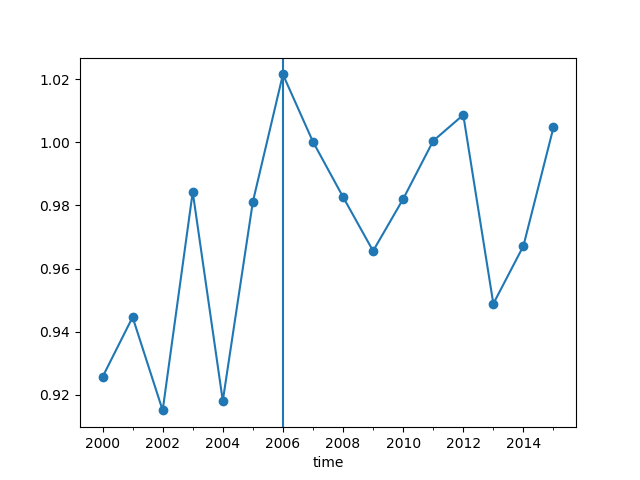

In [78]:
era5_ann['ERA5']['2000':'2015'].plot(marker='o')
plt.axvline(dt.datetime(2006,1,1))